In [1]:
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as sm
import statsmodels.api as smf
%matplotlib inline

In [2]:
from Parameters import *
from Run_LCA_model import Run_LCA_model

In [3]:
buildings_path = '..\shapefiles\\building_block_people_WGS_3_int.csv'
schedule = 'scheduled' 
logistics = 'grid'
n_collection = 1
Result_Energy_m3 = pd.DataFrame()
Result_GHG_m3 = pd.DataFrame()
Result_COST_m3 = pd.DataFrame()
i=2
while i < 100:
    n_regen = i
    Total_Energy_m3, Total_GHG_m3, Total_COST_m3= Run_LCA_model(buildings_path, n_regen, n_collection, schedule, logistics)
    Result_Energy_m3 = Result_Energy_m3.append(Total_Energy_m3)
    Result_GHG_m3 = Result_GHG_m3.append(Total_GHG_m3)
    Result_COST_m3 = Result_COST_m3.append(Total_COST_m3)
    print (i)
    if i<10:
        i = i + 2
    else:
        i = i+10

Start calculating distances for scheduled...
calc distances took time 20.14456272125244
2
Start calculating distances for scheduled...
calc distances took time 21.325180053710938
4
Start calculating distances for scheduled...
calc distances took time 21.192885875701904
6
Start calculating distances for scheduled...
calc distances took time 20.266632795333862
8
Start calculating distances for scheduled...
calc distances took time 20.794728994369507
10
Start calculating distances for scheduled...
calc distances took time 21.060798168182373
20
Start calculating distances for scheduled...
calc distances took time 18.707908868789673
30
Start calculating distances for scheduled...
calc distances took time 17.98739242553711
40
Start calculating distances for scheduled...
calc distances took time 17.733907222747803
50
Start calculating distances for scheduled...
calc distances took time 17.705021858215332
60
Start calculating distances for scheduled...
calc distances took time 17.9671170711517

In [4]:
Result_Energy_m3["sum"] = (Result_Energy_m3.sum(axis=1)) - Result_Energy_m3["n_facilities"]
Result_GHG_m3["sum"] = (Result_GHG_m3.sum(axis=1)) - Result_GHG_m3["n_facilities"]
Result_COST_m3["sum"] = (Result_COST_m3.sum(axis=1)) - Result_COST_m3["n_facilities"]

Result_Energy_m3 = pd.read_csv('Energy_result.csv')
Result_GHG_m3 = pd.read_csv('GHG_result.csv')

Result_Energy_m3=pd.read_csv('Energy_result_unscheduled.csv')
Result_GHG_m3=pd.read_csv('GHG_result_unscheduled.csv')

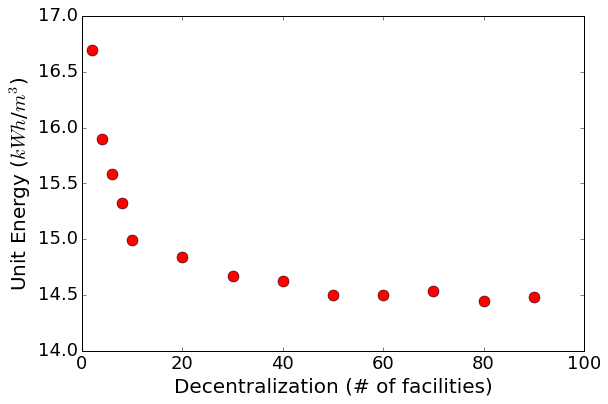

In [5]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_Energy_m3["n_facilities"], Result_Energy_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(50,100)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)', fontsize = 20)

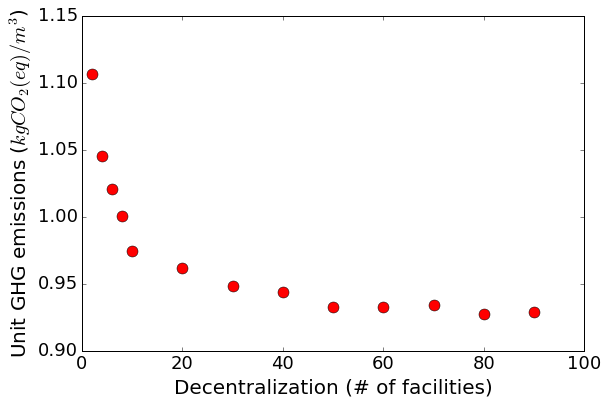

In [6]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_GHG_m3["n_facilities"], Result_GHG_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)', fontsize = 20)

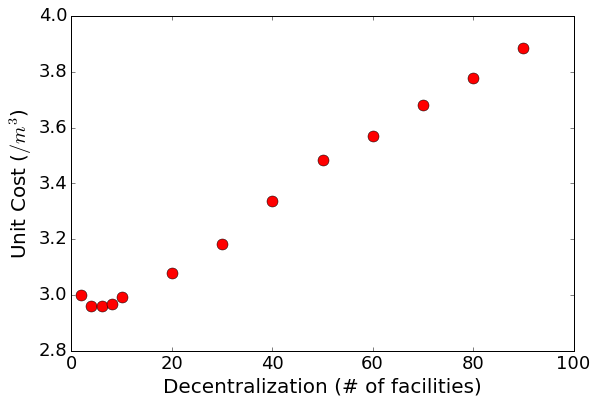

In [7]:
fig = plt.figure(figsize=(9,6))
plt.plot(Result_COST_m3["n_facilities"], Result_COST_m3["sum"], 'ro', markersize=11)
plt.xticks(fontsize = 18)
plt.xlim(0,100)
#plt.ylim(3.5,4.5)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)
plt.yticks(fontsize = 18)
plt.ylabel('Unit Cost ($/m^3$)', fontsize = 20)

In [8]:
Result_COST_m3

,Resin manufacturing,Resin transport,Catridge manufacturing,Catridge transport,Tank manufacturing,Tank transport,Pump operation,Pump manufacturing,Pump transport,Acid manufacturing,Acid transport,Logistics_regen,trucks manufacturing,facility space,Logistics_collect,n_facilities,sum
0,0.670953,0.000031,0.068414,0.000001,0.000136,0.000001,0.000068,0.000876,0.000006,0.546647,0.000058,0.604807,1.057091,0.048850,0.000389,2,2.998329
0,0.670953,0.000062,0.068414,0.000002,0.000137,0.000002,0.000136,0.001752,0.000012,0.546647,0.000116,0.542073,1.053819,0.076467,0.000882,4,2.961473
0,0.670953,0.000093,0.068414,0.000003,0.000139,0.000003,0.000205,0.002628,0.000017,0.546647,0.000174,0.516524,1.050546,0.104083,0.001025,6,2.961454
0,0.670953,0.000123,0.068414,0.000005,0.000140,0.000005,0.000273,0.003503,0.000023,0.546647,0.000231,0.495434,1.050546,0.131700,0.001025,8,2.969022
0,0.670953,0.000185,0.068414,0.000007,0.000141,0.000007,0.000409,0.005255,0.000035,0.546647,0.000347,0.467083,1.044000,0.186934,0.001373,10,2.991792
0,0.670953,0.000309,0.068414,0.000012,0.000144,0.000012,0.000682,0.008759,0.000058,0.546647,0.000579,0.450265,1.034182,0.297402,0.001619,20,3.080035
0,0.670953,0.000463,0.068414,0.000017,0.000147,0.000017,0.001023,0.013138,0.000087,0.546647,0.000868,0.431746,1.011273,0.435486,0.001865,30,3.182144
0,0.670953,0.000648,0.068414,0.000024,0.000149,0.000024,0.001433,0.018393,0.000122,0.546647,0.001215,0.420787,1.004728,0.601187,0.002111,40,3.336836
0,0.670953,0.000864,0.068414,0.000032,0.000152,0.000032,0.001910,0.024524,0.000162,0.546647,0.001620,0.403635,0.968728,0.794505,0.002357,50,3.484536
0,0.670953,0.000972,0.068414,0.000036,0.000153,0.000036,0.002149,0.027589,0.000182,0.546647,0.001823,0.399497,0.958909,0.891164,0.002603,60,3.571129


In [25]:
Result_Energy_m3_plot = Result_Energy_m3.drop('sum',1).drop('n_facilities',1)
Result_GHG_m3_plot = Result_GHG_m3.drop('sum',1).drop('n_facilities',1)
Result_COST_m3_plot = Result_COST_m3.drop('sum',1).drop('n_facilities',1)

In [26]:
Result_Energy_m3_plot['other'] = (Result_Energy_m3_plot['Resin transport'] + Result_Energy_m3_plot['Catridge transport']+
                                  Result_Energy_m3_plot['Tank transport'] + Result_Energy_m3_plot['Pump transport'] +
                                  Result_Energy_m3_plot['Acid transport']+ Result_Energy_m3_plot['Tank manufacturing'] +
                                 Result_Energy_m3_plot['Pump manufacturing'])
Result_GHG_m3_plot['other'] = (Result_GHG_m3_plot['Resin transport'] + Result_GHG_m3_plot['Catridge transport']+
                                  Result_GHG_m3_plot['Tank transport'] + Result_GHG_m3_plot['Pump transport'] +
                                  Result_GHG_m3_plot['Acid transport'] + Result_GHG_m3_plot['Tank manufacturing'] +
                                 Result_GHG_m3_plot['Pump manufacturing'])
Result_COST_m3_plot['other'] = (Result_COST_m3_plot['Resin transport'] + Result_COST_m3_plot['Catridge transport']+
                                  Result_COST_m3_plot['Tank transport'] + Result_COST_m3_plot['Pump transport'] +
                                  Result_COST_m3_plot['Acid transport'] + Result_COST_m3_plot['Tank manufacturing'] +
                                 Result_COST_m3_plot['Pump manufacturing']+ Result_COST_m3_plot['Logistics_collect'])

Result_Energy_m3_plot = Result_Energy_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_GHG_m3_plot = Result_GHG_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing'] , 1)
Result_COST_m3_plot = Result_COST_m3_plot.drop(['Resin transport', 'Catridge transport', 
                                                    'Tank transport', 'Pump transport', 'Acid transport', 'Tank manufacturing',
                                                   'Pump manufacturing', 'Logistics_collect'] , 1)

In [27]:
Result_Energy_m3_plot_low = Result_Energy_m3_plot[0:1]
Result_GHG_m3_plot_low = Result_GHG_m3_plot[0:1]
Result_COST_m3_plot_low = Result_COST_m3_plot[0:1]
Result_Energy_m3_plot_high = Result_Energy_m3_plot[8:9]
Result_GHG_m3_plot_high = Result_GHG_m3_plot[8:9]
Result_COST_m3_plot_high = Result_COST_m3_plot[8:9]

(array([ 0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 <a list of 7 Text yticklabel objects>)

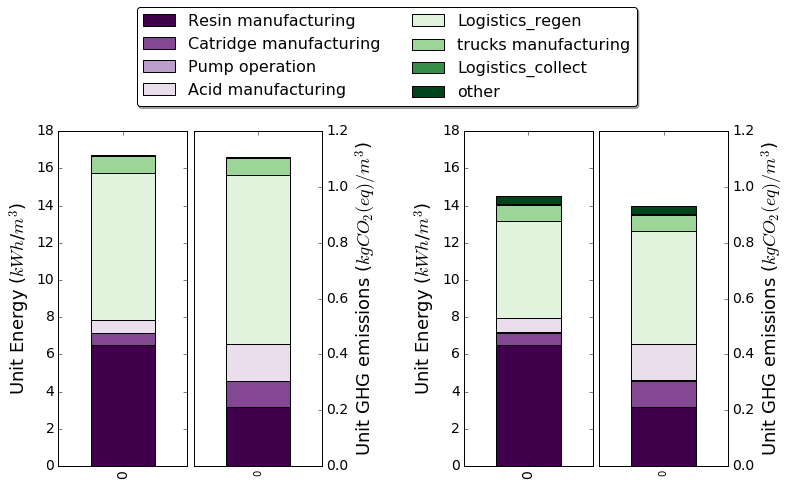

In [28]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,5, 1)
a=Result_Energy_m3_plot_low.plot(kind='bar', stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
ax = fig.add_subplot(1,5, 2)
b=Result_GHG_m3_plot_low.plot(kind='bar', stacked = True, secondary_y=True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 1.2)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
b.legend(loc='lower center', bbox_to_anchor=(1.5, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
ax = fig.add_subplot(1,5, 4)
c=Result_Energy_m3_plot_high.plot(kind='bar', stacked = True,ax=ax, legend=False,colormap='PRGn')
plt.ylim(0, 18)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax = fig.add_subplot(1,5, 5)
d=Result_GHG_m3_plot_high.plot(kind='bar', stacked = True, ax=ax, secondary_y=True, legend=False,colormap='PRGn')
plt.ylim(0, 1.2)
#fig.tight_layout()
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=18)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.05, hspace=None)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

(array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5]),
 <a list of 8 Text yticklabel objects>)

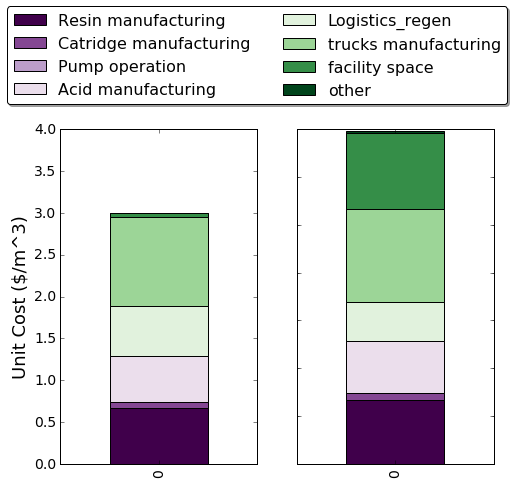

In [29]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1,3, 1)
a=Result_COST_m3_plot_low.plot(kind='bar', sharey=True, stacked = True, ax=ax, legend=False,colormap='PRGn')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.ylim(0, 4)
plt.ylabel('Unit Cost ($/m^3)',fontsize=18)
a.legend(loc='lower center', bbox_to_anchor=(1, 1.05),ncol=2, fancybox=True, shadow=True,fontsize=16)
ax = fig.add_subplot(1,3, 2)
c=Result_COST_m3_plot_high.plot(kind='bar',sharey=True, stacked = True,ax=ax, legend=False,colormap='PRGn')

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

In [32]:
Result_Energy_m3.to_csv('../results/Energy_m3_%s.csv'% (logistics)) 
Result_GHG_m3.to_csv('../results/GHG_m3_%s.csv'% (logistics)) 
Result_COST_m3.to_csv('../results/COST_m3_%s.csv'% (logistics)) 

In [ ]:
Energy_optimal = pd.read_csv('../results/Energy_m3_optimal.csv')
Energy_grid = pd.read_csv('../results/Energy_m3_grid.csv')
Energy_random = pd.read_csv('../results/Energy_m3_random.csv')
GHG_optimal = pd.read_csv('../results/GHG_m3_optimal.csv')
GHG_grid = pd.read_csv('../results/GHG_m3_grid.csv')
GHG_random = pd.read_csv('../results/GHG_m3_random.csv')
#COST_optimal = pd.read_csv('../results/COST_m3_optimal.csv')
#COST_grid = pd.read_csv('../results/COST_m3_grid.csv')
#COST_random = pd.read_csv('../results/COST_m3_random.csv')

In [ ]:
Energy_optimal_log= Energy_optimal
Energy_optimal_log['logx'] = np.log(Energy_optimal_log['n_facilities'])
Energy_optimal_log['logEnergy'] = np.log(Energy_optimal_log['sum'])
energy_optimal = np.array(Energy_optimal_log['logEnergy'])
scale_optimal = np.array(Energy_optimal_log['logx'])

Energy_grid_log= Energy_grid
Energy_grid_log['logx'] = np.log(Energy_grid_log['n_facilities'])
Energy_grid_log['logEnergy'] = np.log(Energy_grid_log['sum'])
energy_grid = np.array(Energy_grid_log['logEnergy'])
scale_grid = np.array(Energy_grid_log['logx'])

Energy_random_log= Energy_random
Energy_random_log['logx'] = np.log(Energy_random_log['n_facilities'])
Energy_random_log['logEnergy'] = np.log(Energy_random_log['sum'])
energy_random = np.array(Energy_random_log['logEnergy'])
scale_random = np.array(Energy_random_log['logx'])

GHG_optimal_log = GHG_optimal
GHG_optimal_log['logx'] = np.log(GHG_optimal_log['n_facilities'])
GHG_optimal_log['logGHG'] = np.log(GHG_optimal_log['sum'])
GHG_optimal = np.array(GHG_optimal_log['logGHG'])

GHG_grid_log= GHG_grid
GHG_grid_log['logx'] = np.log(GHG_grid_log['n_facilities'])
GHG_grid_log['logGHG'] = np.log(GHG_grid_log['sum'])
GHG_grid = np.array(GHG_grid_log['logGHG'])

GHG_random_log= GHG_random
GHG_random_log['logx'] = np.log(GHG_random_log['n_facilities'])
GHG_random_log['logGHG'] = np.log(GHG_random_log['sum'])
GHG_random = np.array(GHG_random_log['logGHG'])


In [ ]:
X_optimal = smf.add_constant(scale_optimal)
model = smf.OLS(energy_optimal , X_optimal)
results_optimal_energy = model.fit()

X_grid = smf.add_constant(scale_grid)
model = smf.OLS(energy_grid , X_grid)
results_grid_energy = model.fit()

X_random = smf.add_constant(scale_random)
model = smf.OLS(energy_random , X_random)
results_random_energy = model.fit()

X_optimal_GHG = smf.add_constant(scale_optimal)
model = smf.OLS(GHG_optimal , X_optimal_GHG)
results_optimal_GHG = model.fit()

X_grid_GHG = smf.add_constant(scale_grid)
model = smf.OLS(GHG_grid , X_grid_GHG)
results_grid_GHG = model.fit()

X_random_GHG = smf.add_constant(scale_random)
model = smf.OLS(GHG_random , X_random_GHG)
results_random_GHG = model.fit()

In [ ]:
x1 = np.linspace(0,100, 500) # 100 linearly spaced numbers
y1_optimal = (x1**(results_optimal_energy.params[1]))*math.exp(results_optimal_energy.params[0])
aa=list(zip(x1,y1_optimal))
pl_optimal=pd.DataFrame(aa)
pl_optimal.columns=['x','iso-distant']

y1_grid = (x1**(results_grid_energy.params[1]))*math.exp(results_grid_energy.params[0])
aa=list(zip(x1,y1_grid))
pl_grid=pd.DataFrame(aa)
pl_grid.columns=['x','grid']

y1_random = (x1**(results_random_energy.params[1]))*math.exp(results_random_energy.params[0])
aa=list(zip(x1,y1_random))
pl_random=pd.DataFrame(aa)
pl_random.columns=['x','random']

y1_optimal_GHG = (x1**(results_optimal_GHG.params[1]))*math.exp(results_optimal_GHG.params[0])
aa=list(zip(x1,y1_optimal_GHG))
pl_optimal_GHG=pd.DataFrame(aa)
pl_optimal_GHG.columns=['x','iso-distant']

y1_grid_GHG = (x1**(results_grid_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_grid_GHG))
pl_grid_GHG=pd.DataFrame(aa)
pl_grid_GHG.columns=['x','grid']

y1_random_GHG = (x1**(results_random_GHG.params[1]))*math.exp(results_grid_GHG.params[0]) 
aa=list(zip(x1,y1_random_GHG))
pl_random_GHG=pd.DataFrame(aa)
pl_random_GHG.columns=['x','random']

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal.plot( x='x', y='iso-distant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(20,27)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit Energy ($kWh$/$m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1 ,figsize=(8, 6))
f = pl_optimal_GHG.plot( x='x', y='iso-distant',fontsize=16, c='r', ax=ax, linewidth=4)
g = pl_grid_GHG.plot( x='x', y='grid',fontsize=16, c='b',linestyle='--', ax=ax, linewidth=4)
h = pl_random_GHG.plot( x='x', y='random',fontsize=16, c='g', ax=ax, linewidth=4)
h.legend(fontsize=18)
#plt.ylim(1.35, 2)
plt.grid(which='major', color='grey', linestyle='--', alpha = 0.5)
plt.ylabel('Unit GHG emissions ($kgCO_2(eq)/m^3$)',fontsize=20)
plt.xlabel('Decentralization (# of facilities)', fontsize = 20)

In [21]:
cost_plot = Result_COST_m3['sum']
energy_plot = Result_Energy_m3['sum']

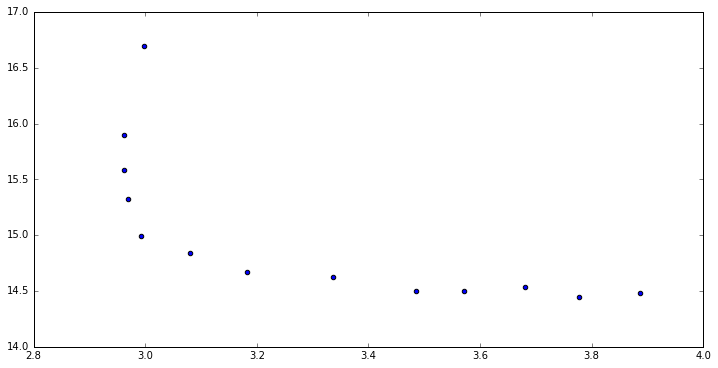

In [22]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(cost_plot,energy_plot)